# Shree Ganeshay Namah



## Lending Club Case Study

In [802]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Understanding & Cleansing Phase

* Objectivs
    * Removing columns having all null values
    * Removing columns having significant null values
    * Removing rows where important columns have null values

In [803]:
#loan_raw = pd.read_csv("C:/Users/kchaniyara/JupyterNoteBooks/LendingClubCaseStudy/LendingClubCaseStudy/loan.csv")
loan_raw = pd.read_csv("loan.csv")

C:\Users\kchaniyara\AppData\Local\Temp\ipykernel_23280\1163387620.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_raw = pd.read_csv("loan.csv")


In [804]:
loan_raw.shape

(39717, 111)

removing columns having all null values

In [805]:
loan_raw_filtered = loan_raw.filter( items=(loan_raw.isnull().sum() < 39717).loc[lambda x:x == True].index.tolist())

In [806]:
loan_raw_filtered.shape

(39717, 57)

In [807]:
loan_raw_filtered.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

Columns "mths_since_last_delinq", "mths_since_last_record","next_pymnt_d" and "desc" are having significant number of null values, so excluding them from analysis 

In [808]:
loan_raw_filtered = loan_raw_filtered.drop(["mths_since_last_delinq", "mths_since_last_record","next_pymnt_d","desc"], axis=1)

In [809]:
loan_raw_filtered.isnull().sum().sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

emp_length might be related to person getting default on loan, so removing rows where emp_length is having null values (1075 records out of 39717)

In [810]:
loan_raw_filtered = loan_raw_filtered[loan_raw_filtered["emp_length"].isnull() == False]

In [811]:
loan_raw_filtered.isnull().sum().sort_values(ascending=False)

emp_title                     1440
pub_rec_bankruptcies           697
last_pymnt_d                    66
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      47
tax_liens                       39
title                           10
last_credit_pull_d               2
total_rec_prncp                  0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                               0
open_acc            

In [812]:
loan_raw_filtered["emp_title"].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Five County Assoc of Governments       1
Far Niente Winery Inc                  1
Tobyhanna Army Depot                   1
Community College of Philadelphia      1
Evergreen Center                       1
Name: count, Length: 28775, dtype: int64

In [813]:
loan_raw_filtered["emp_title"].describe()

count       37202
unique      28775
top       US Army
freq          134
Name: emp_title, dtype: object

Since emp_title is not numeric value and is having large number of unique values (28775 out of 37202), it is not going to add more insights on person getting default, so excluding this column from analysis

In [814]:
loan_raw_filtered = loan_raw_filtered.drop(["emp_title"], axis=1)

pub_rec_bankruptcies can very well influence person's repeating defaulting behavior so let's remove the null values rows for it

In [815]:
loan_raw_filtered = loan_raw_filtered[loan_raw_filtered["pub_rec_bankruptcies"].isnull() == False]

In [816]:
loan_raw_filtered.isnull().sum().sort_values(ascending=False)

last_pymnt_d                  66
revol_util                    47
title                         10
chargeoff_within_12_mths       2
collections_12_mths_ex_med     2
last_credit_pull_d             1
id                             0
total_rec_int                  0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
recoveries                     0
total_rec_late_fee             0
pub_rec                        0
collection_recovery_fee        0
last_pymnt_amnt                0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
pub_rec_bankruptcies           0
revol_bal                      0
open_acc                       0
member_id                      0
annual_inc                     0
loan_amnt                      0
funded_amn

In [817]:
loan_raw_filtered["revol_util"].describe()

count     37898
unique     1087
top          0%
freq        906
Name: revol_util, dtype: object

Since "last_pymnt_d" and "rvevol_util" might be related to person getting default on loan, let's remove null value rows 

In [818]:
loan_raw_filtered = loan_raw_filtered[loan_raw_filtered["last_pymnt_d"].isnull() == False]
loan_raw_filtered = loan_raw_filtered[loan_raw_filtered["revol_util"].isnull() == False]

In [819]:
loan_raw_filtered.isnull().sum().sort_values(ascending=False)


title                         10
chargeoff_within_12_mths       2
collections_12_mths_ex_med     2
last_credit_pull_d             1
id                             0
total_rec_int                  0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
recoveries                     0
total_rec_late_fee             0
pub_rec                        0
collection_recovery_fee        0
last_pymnt_d                   0
last_pymnt_amnt                0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
pub_rec_bankruptcies           0
revol_bal                      0
open_acc                       0
member_id                      0
annual_inc                     0
loan_amnt                      0
funded_amn

In [820]:
loan_raw_filtered["title"].value_counts()

title
Debt Consolidation                        2118
Debt Consolidation Loan                   1683
Personal Loan                              616
Consolidation                              498
debt consolidation                         480
                                          ... 
Pay it Down                                  1
Debt Free Goal                               1
Fix it up                                    1
don't sell the Cadillac.                     1
Merging 2 Accounts into one to save $$       1
Name: count, Length: 18678, dtype: int64

In [821]:
loan_raw_filtered["title"].describe()

count                  37826
unique                 18678
top       Debt Consolidation
freq                    2118
Name: title, dtype: object

as title is having large number of uniqe values and it is not a numeric value, let's remove it from analysis

In [822]:
loan_raw_filtered = loan_raw_filtered.drop(["title"], axis=1)

In [823]:
loan_raw_filtered.isnull().sum().sort_values(ascending=False)

chargeoff_within_12_mths      2
collections_12_mths_ex_med    2
last_credit_pull_d            1
id                            0
total_rec_late_fee            0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
collection_recovery_fee       0
recoveries                    0
pub_rec                       0
last_pymnt_d                  0
last_pymnt_amnt               0
policy_code                   0
application_type              0
acc_now_delinq                0
delinq_amnt                   0
pub_rec_bankruptcies          0
revol_bal                     0
open_acc                      0
member_id                     0
annual_inc                    0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term    

In [824]:
loan_raw_filtered.shape

(37836, 51)

excluding null value rows for "chargeoff_within_12_mths", "collections_12_mths_ex_med" and "last_credit_pull_d" as there are very few such rows

In [825]:
loan_raw_filtered = loan_raw_filtered[loan_raw_filtered["chargeoff_within_12_mths"].isnull() == False]
loan_raw_filtered = loan_raw_filtered[loan_raw_filtered["collections_12_mths_ex_med"].isnull() == False]
loan_raw_filtered = loan_raw_filtered[loan_raw_filtered["last_credit_pull_d"].isnull() == False]

In [826]:
loan_raw_filtered.isnull().sum().keys().sort_values()

Index(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti',
       'earliest_cr_line', 'emp_length', 'funded_amnt', 'funded_amnt_inv',
       'grade', 'home_ownership', 'id', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'member_id', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
       'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade',
       'tax_liens', 'term', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'url',
       'verification_status', 'zip_code'],
      dtype='object')

## Data Cleaning and Manipulation Phase

* Objectives
    * Understand each variable values (Uni variate Analysis), ranges and evaluate if it is meaningful for analysis
    * Remove column from analysis if that column is not meaningful
    * Clean data/Impute data if required    
    * derive type driven metrics if possible

In [827]:
print(loan_raw_filtered["id"].nunique())
print(loan_raw_filtered.shape)
loan_data = loan_raw_filtered.drop(["id"], axis=1)
# Id is unique variable for each applicant so not adding any value in analysis

37833
(37833, 51)


In [828]:
print(loan_raw_filtered["recoveries"].describe())
# Post Charge off recovery is not a meaningful parameter in deciding person's defaulting behavior
loan_data = loan_data.drop(["recoveries"], axis=1)

count    37833.000000
mean        94.549679
std        690.395333
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64


In [829]:
print(loan_data["application_type"].describe())
loan_data = loan_data.drop(["application_type"], axis=1)
# application_type has single value "Individual", so removing from analysis

count          37833
unique             1
top       INDIVIDUAL
freq           37833
Name: application_type, dtype: object


In [830]:
print(loan_data["pymnt_plan"].describe())
loan_data = loan_data.drop(["pymnt_plan"], axis=1)
# pymnt_plan has single value "n", so removing from analysis

count     37833
unique        1
top           n
freq      37833
Name: pymnt_plan, dtype: object


In [831]:
print(loan_data["member_id"].describe())
print(loan_data["member_id"].nunique())
loan_data = loan_data.drop(["member_id"], axis=1)
# pymnt_plan has all unique values, so removing it from analysis

count    3.783300e+04
mean     8.597925e+05
std      2.542345e+05
min      8.036400e+04
25%      6.732150e+05
50%      8.556130e+05
75%      1.049074e+06
max      1.314167e+06
Name: member_id, dtype: float64
37833


In [832]:
print(loan_data["tax_liens"].describe())
print(loan_data["tax_liens"].nunique())
loan_data = loan_data.drop(["tax_liens"], axis=1)
# tax_liens has only one uniqe value 0.0, so removing it from analysis

count    37833.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64
1


In [833]:
print(loan_data["url"].describe())
print(loan_data["url"].nunique())
loan_data = loan_data.drop(["url"], axis=1)
# url has all uniqe values, so removing it from analysis

count                                                 37833
unique                                                37833
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object
37833


In [834]:
print(loan_data["initial_list_status"].describe())
print(loan_data["initial_list_status"].nunique())
loan_data = loan_data.drop(["initial_list_status"], axis=1)
# initial_list_status has only one possible value "f" so remvoing it from analysis

count     37833
unique        1
top           f
freq      37833
Name: initial_list_status, dtype: object
1


In [835]:
# total_rec_late_fee ,collection_recovery_fee are not meaning ful for our analysis
loan_data = loan_data.drop(["collection_recovery_fee","total_rec_late_fee"], axis=1)

In [836]:
print(loan_data["policy_code"].describe())
print(loan_data["policy_code"].nunique())
# policy_code is having only one value, so remvoing it from analysis
loan_data = loan_data.drop(["policy_code"], axis=1)

count    37833.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64
1


In [837]:
loan_data["emp_length"].value_counts()

emp_length
10+ years    8750
< 1 year     4397
2 years      4291
3 years      4023
4 years      3377
5 years      3235
1 year       3133
6 years      2193
7 years      1747
8 years      1449
9 years      1238
Name: count, dtype: int64

In [838]:
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x: int(x.replace("years","").replace("year","").replace("< 1","0").replace("10+","10")))

In [839]:
loan_data["emp_length"].value_counts()

emp_length
10    8750
0     4397
2     4291
3     4023
4     3377
5     3235
1     3133
6     2193
7     1747
8     1449
9     1238
Name: count, dtype: int64

Let's try to understading some of the key parameters influencing loan default, like loan amount, annual income, interest rate, loan grade, debt to income ratio, funded amount, funded amount by investor etc.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

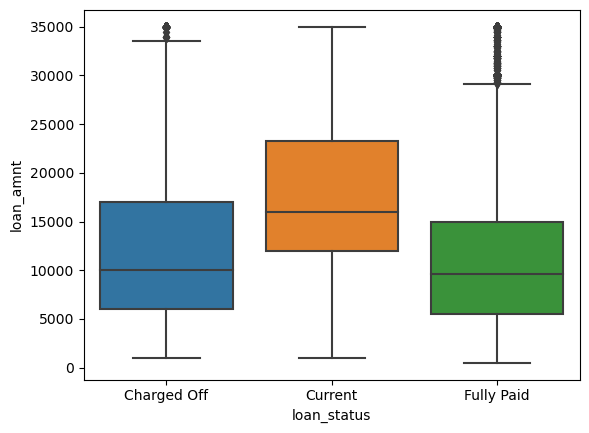

In [840]:
#Let's first understand the loan amount by loan status and try to visualize spread for loan amount
sns.boxplot(data=loan_data,y="loan_amnt",x="loan_status", order=sorted(loan_data_filtered["loan_status"].unique()))

<Axes: xlabel='loan_status', ylabel='annual_inc'>

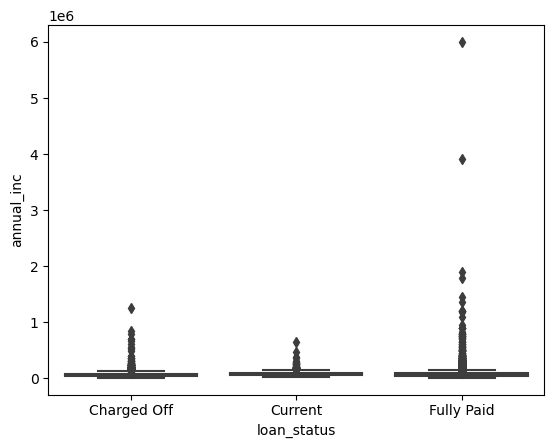

In [841]:
sns.boxplot(data=loan_data,y="annual_inc",x="loan_status", order=sorted(loan_data_filtered["loan_status"].unique()))

<Axes: xlabel='loan_status', ylabel='annual_inc'>

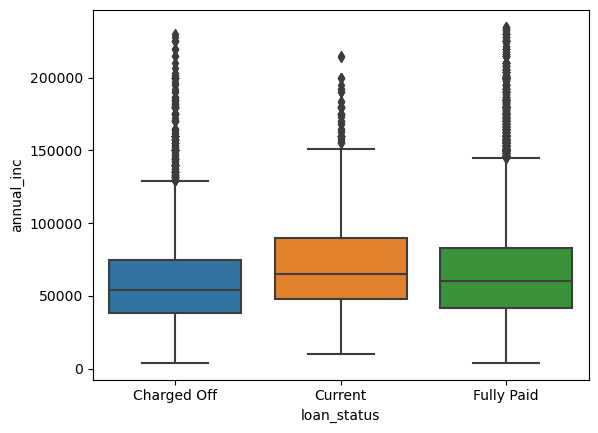

In [842]:
# from the above visual it seems, there are very few data points which are skewed towards higher side, lets remove top 1% data point
loan_data = loan_data[loan_data["annual_inc"] < loan_data["annual_inc"].quantile(0.99)]

sns.boxplot(data=loan_data,y="annual_inc",x="loan_status", order=sorted(loan_data_filtered["loan_status"].unique()))

# after removing samples with top 1% income, now we are able to see all quantiles clearly

C:\Users\kchaniyara\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


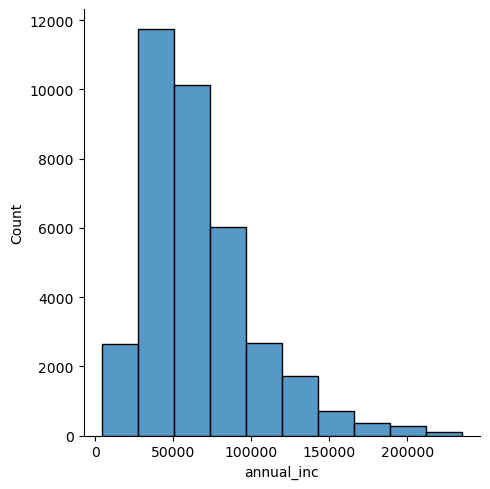

In [877]:
sns.displot(x="annual_inc", data=loan_data, bins=10)

In [843]:
# now let's remove the loan with status ="Current" as loans in the state can either go to "fully paid" or "charged off" status.
#loan_data = loan_data[loan_data.loan_status.isin(["Fully Paid","Charged Off"])]

In [844]:
# now let's try to understand interest rates values
loan_data["int_rate"].head()
# we need to remove % sign from the int_rate column and make it float type

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [845]:
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda x: float(x[:-1]))
loan_data["int_rate"].describe()

count    36366.000000
mean        11.965760
std          3.693633
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Axes: xlabel='loan_status', ylabel='int_rate'>

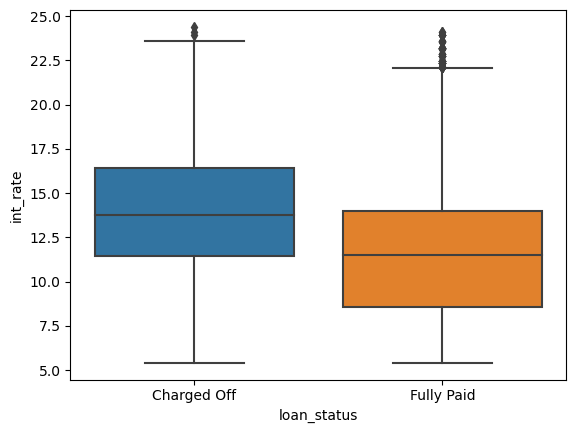

In [846]:
# plottting box plot for int_rate
sns.boxplot(data=loan_data,y="int_rate",x="loan_status", order=sorted(loan_data["loan_status"].unique()))

<Axes: xlabel='loan_status', ylabel='dti'>

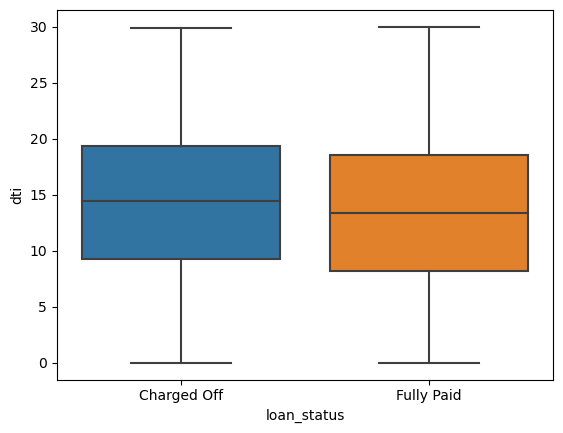

In [865]:
# Now let's try to understand debt to income ratio and see it's distribution for loan_status
sns.boxplot(data=loan_data,y="dti",x="loan_status", order=sorted(loan_data["loan_status"].unique()))

<Axes: xlabel='loan_status', ylabel='installment'>

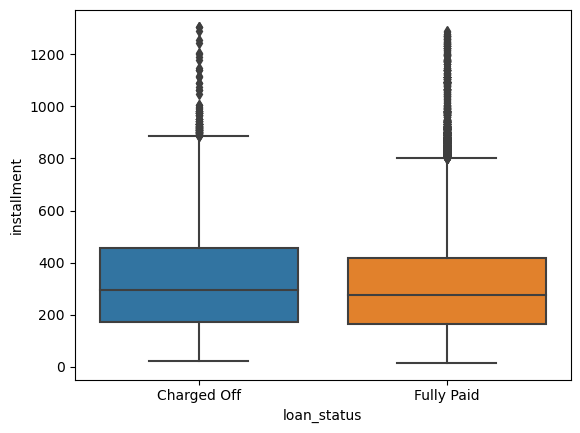

In [867]:
# Now let's try to understand installment amount and see it's distribution for loan_status
sns.boxplot(data=loan_data,y="installment",x="loan_status", order=sorted(loan_data["loan_status"].unique()))

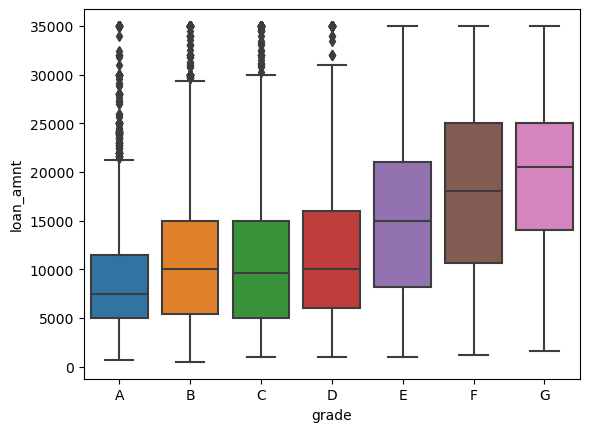

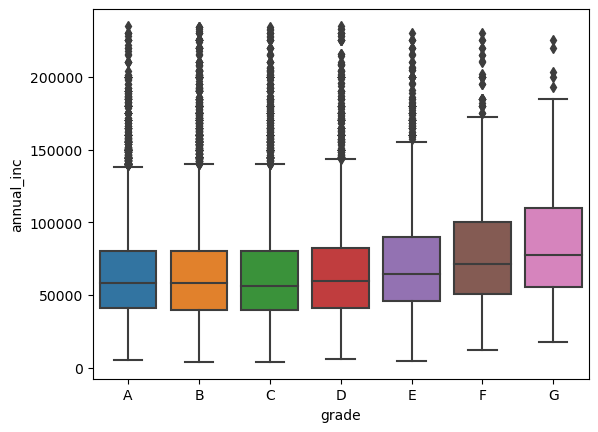

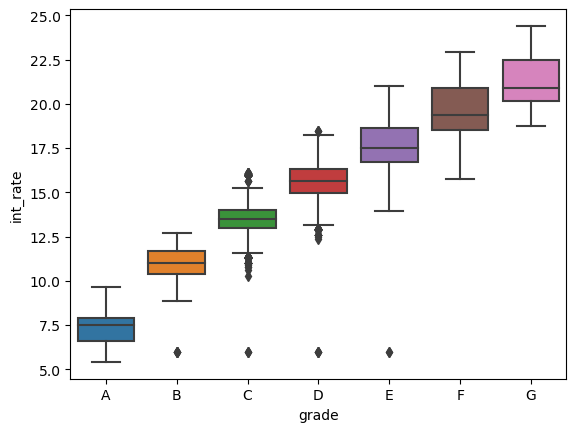

<Axes: xlabel='grade', ylabel='dti'>

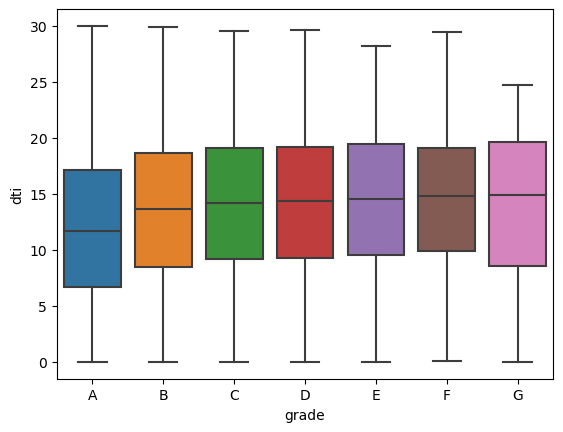

In [870]:
# Now let's try to understand loan amount,annual income, installment amount, interest rate and dti by loan grade
sns.boxplot(data=loan_data,y="loan_amnt",x="grade", order=sorted(loan_data["grade"].unique()))
plt.show()


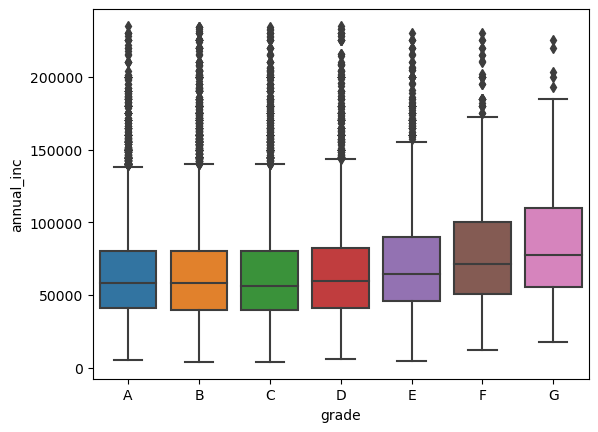

In [871]:
sns.boxplot(data=loan_data,y="annual_inc",x="grade", order=sorted(loan_data["grade"].unique()))
plt.show()


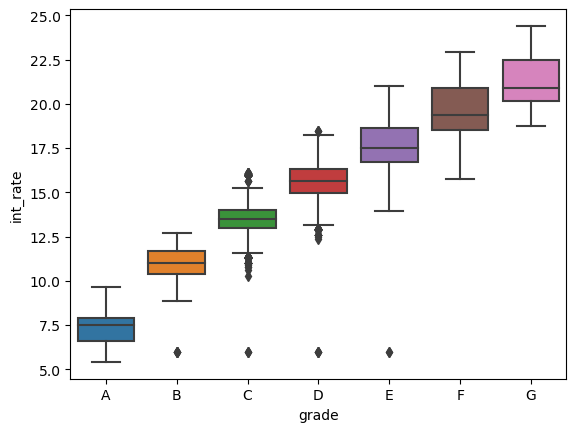

In [872]:
sns.boxplot(data=loan_data,y="int_rate",x="grade", order=sorted(loan_data["grade"].unique()))
plt.show()


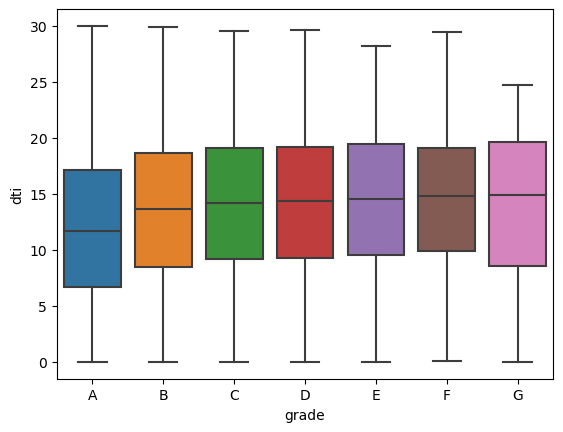

In [873]:
sns.boxplot(data=loan_data,y="dti",x="grade", order=sorted(loan_data["grade"].unique()))
plt.show()

<Axes: xlabel='grade'>

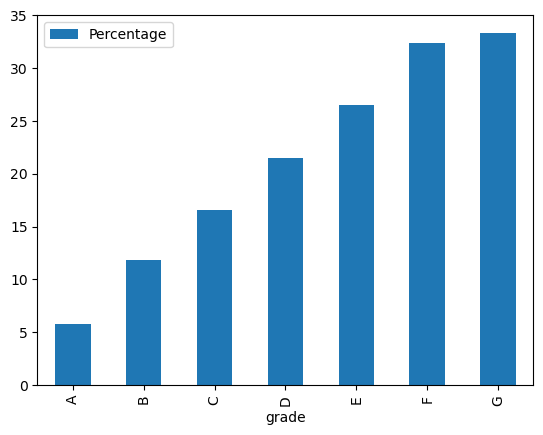

In [850]:
loan_by_status_grade = loan_data.groupby(["grade","loan_status"],as_index=False)[["term"]].count().rename(columns={"term":"Count"})
loan_by_grade = loan_data.groupby(["grade"])[["term"]].count().rename(columns={"term":"Count"})

loan_by_status_grade = loan_by_status_grade.join(loan_by_grade,on="grade",lsuffix="left",rsuffix="right")
loan_by_status_grade["Percentage"] = 100.0* loan_by_status_grade["Countleft"]/loan_by_status_grade["Countright"]
loan_by_status_grade = loan_by_status_grade.rename(columns={"Countleft":"count"}).drop(["Countright"],axis=1)#
#loan_by_status_grade
loan_by_status_grade[loan_by_status_grade["loan_status"] == "Charged Off"].plot(kind="bar",x="grade",y="Percentage")

<Axes: xlabel='grade'>

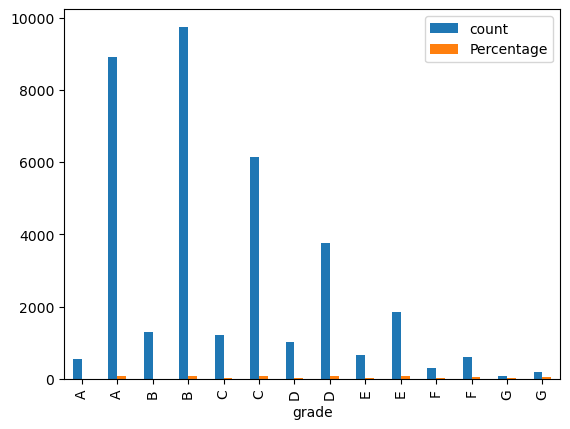

In [851]:
# First let's try to understand which grades of loans are defaulted the most
loan_by_status_grade.plot(kind="bar",x="grade")
# here it seems loans are defaulted in the order of grades from high to low as B, C , D , E , A , F , G.

<Axes: xlabel='grade', ylabel='annual_inc'>

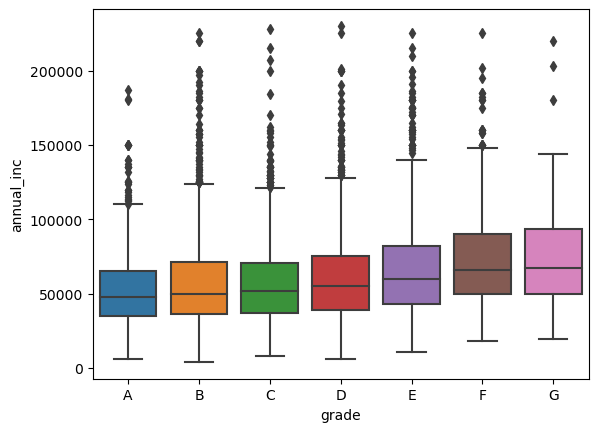

In [852]:
sns.boxplot(data=loan_defaulted,y="annual_inc",x="grade", order=sorted(loan_defaulted["grade"].unique()))
# median interest rate is increasing as loan grade degrades , which is obvisous as secured loan are generally avialble cheaper, i.e lower interest rate, but un secured loans costs higher interest rates

<Axes: xlabel='grade', ylabel='int_rate'>

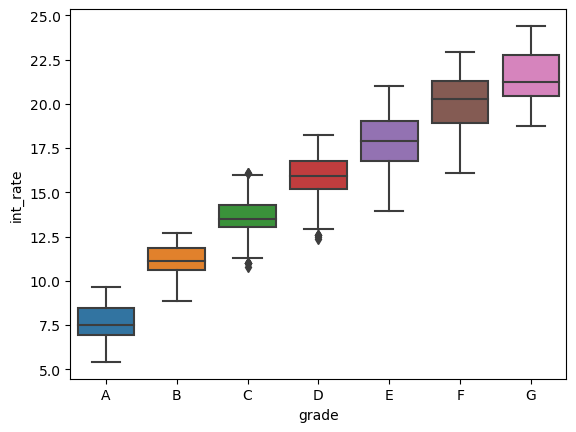

In [853]:
sns.boxplot(data=loan_defaulted,y="int_rate",x="grade", order=sorted(loan_defaulted["grade"].unique()))
# median interest rate is increasing as loan grade degrades , which is obvisous as secured loan are generally avialble cheaper, i.e lower interest rate, but un secured loans costs higher interest rates

<Axes: xlabel='grade', ylabel='loan_amnt'>

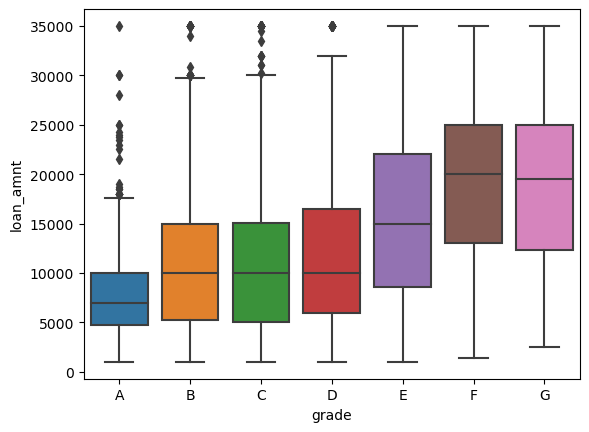

In [854]:
sns.boxplot(data=loan_defaulted,y="loan_amnt",x="grade", order=sorted(loan_defaulted["grade"].unique()))
# median and 75 quantile of loan amount and areincreasing as loan grade degrades. 
# which means more of loans of higher amounts are not secured or of lower grades. These loans have higher chances of getting default

<Axes: xlabel='term'>

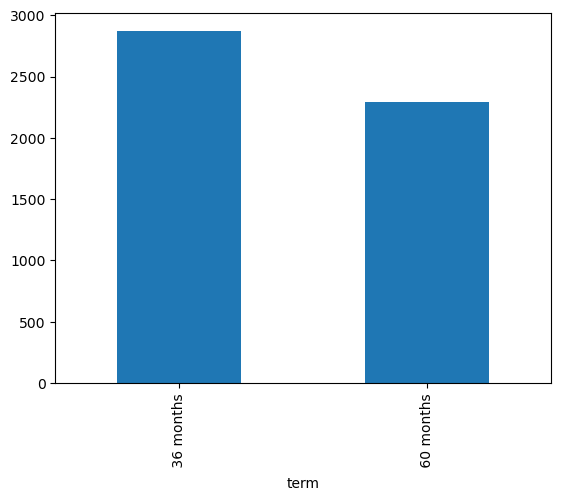

In [855]:

loan_defaulted.groupby(["term"])["term"].count().plot(kind="bar")

<Axes: xlabel='grade', ylabel='dti'>

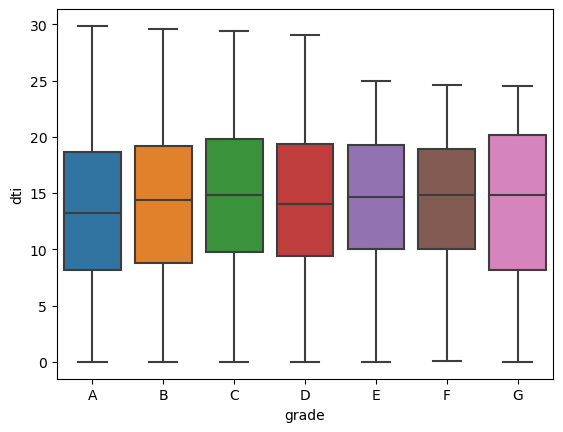

In [856]:
sns.boxplot(data=loan_defaulted,y="dti",x="grade", order=sorted(loan_defaulted["grade"].unique()))

<Axes: xlabel='grade', ylabel='dti'>

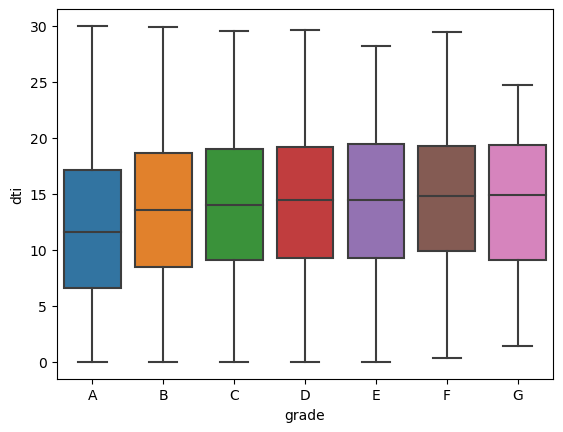

In [857]:

sns.boxplot(data=loan_paid,y="dti",x="grade", order=sorted(loan_paid["grade"].unique()))

<Axes: xlabel='grade', ylabel='funded_amount_ratio'>

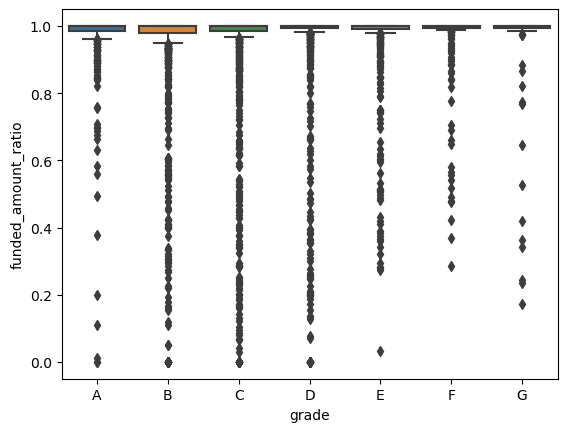

In [858]:

sns.boxplot(data=loan_defaulted,y="funded_amount_ratio",x="grade", order=sorted(loan_data["grade"].unique()))

In [859]:
loan_data["funded_amnt_inv"].describe()

count    36366.000000
mean     10364.237457
std       6927.194162
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14157.331430
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [860]:
loan_defaulted["emp_length"].value_counts()

emp_length
10    1279
0      598
2      542
3      538
5      441
4      435
1      429
6      296
7      256
8      196
9      152
Name: count, dtype: int64

<Axes: xlabel='pub_rec'>

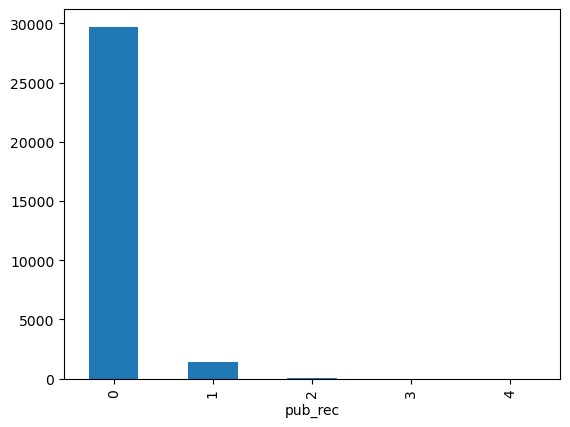

In [861]:
#sns.barplot(data=loan_paid,y="pub_rec_bankruptcies",x="grade", order=sorted(loan_paid["grade"].unique()))
loan_paid["pub_rec"].value_counts().plot(kind="bar")

<Axes: xlabel='pub_rec'>

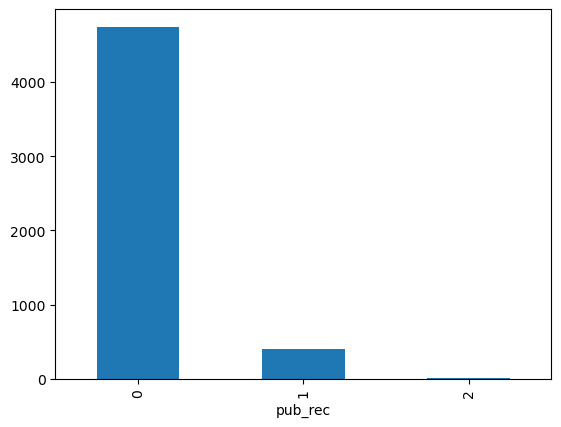

In [862]:
#sns.barplot(data=loan_defaulted,y="pub_rec_bankruptcies",x="grade", order=sorted(loan_defaulted["grade"].unique()))
loan_defaulted["pub_rec"].value_counts().plot(kind="bar")

<Axes: xlabel='grade', ylabel='emp_length'>

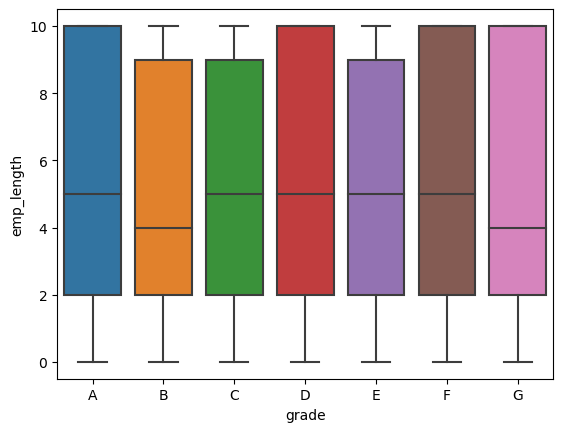

In [863]:
sns.boxplot(data=loan_defaulted,y="emp_length",x="grade", order=sorted(loan_defaulted["grade"].unique()))

In [864]:
loan_data["funded_amount_ratio"] = loan_data["funded_amnt_inv"]/loan_data["funded_amnt"]